# Linear Regression

คุณมีเพื่อนคนหนี่งที่ทำงานในวงการอสังหาริมทรัพย์  เพื่อนคนนี้อยากได้โปรแกรมที่สามารถประเมินราคาที่ดินได้อย่างรวดเร็ว

จากข้อมูลที่มีอยู่ เข้าอยากรู้ว่า 
1. ราคาที่ประเมินมีความแม่นยำมากน้อยแค่ไหน
2. ข้อมูล input ที่จำเป็นสำหรับโปรแกรมมีอะไรบ้าง

# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# The Data
    Number of Instances: 506 
    Missing Attribute Values: None
    Features:
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
load_boston?

In [ ]:
boston_data = load_boston()

In [ ]:
print(boston_data['DESCR'])

In [ ]:
print(f"type   : {type(boston_data['feature_names'])}")
print(f"shape  : {boston_data['feature_names'].shape}")
print(f"example: {boston_data['feature_names']}")

In [ ]:
print(f"type   : {type(boston_data['data'])}")
print(f"shape  : {boston_data['data'].shape}")
print(f"example: {boston_data['data']}")

In [ ]:
print(f"type   : {type(boston_data['target'])}")
print(f"shape  : {boston_data['target'].shape}")
print(f"example: {boston_data['target']}")

# Create DataFrame from the data

In [ ]:
df = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
df.head()

In [ ]:
df['TARGET'] = pd.Series(data=boston_data['target'])
df.head()

**ใช้ `head(), describe(), info()` เพื่อดูข้อมูลเบื้องต้น**

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

# Exploratory Data Analysis

ใช้ [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)  เพื่อดูความสัมพันธ์ของแต่ละตัวแปรใน dataset

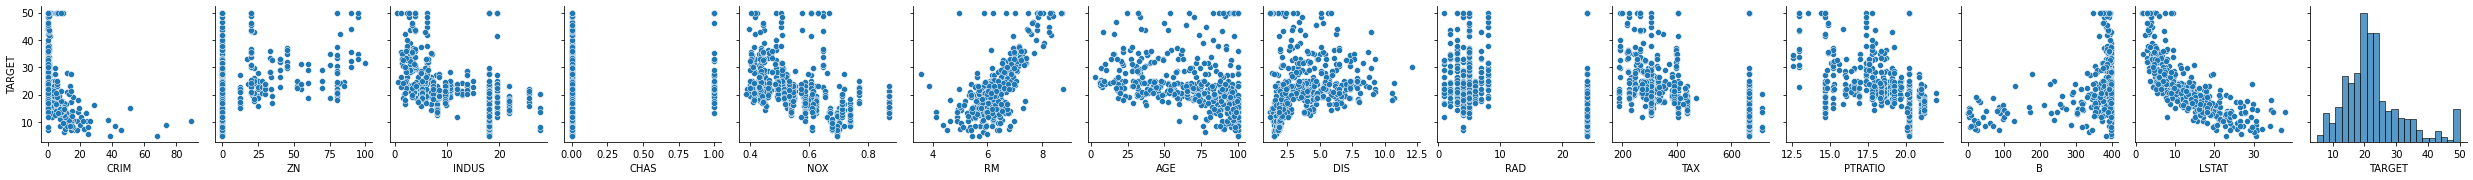

In [ ]:
# sns.pairplot(data=df)
sns.pairplot(data=df, y_vars=['TARGET'])

**จาก pairplot ด้านบนฟีเจอร์ใดบ้างที่มีความสัมพันธ์กับ `TARGET`**

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


*Answer*

# Training and Testing Data

เตรียมข้อมูลสำหรับทำ Linear Regression โดยให้ `X` เป็นตัวแปรต้น และ `y` ตัวแปรตาม

In [ ]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [ ]:
y = df['TARGET']
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: TARGET, dtype: float64

แบ่งข้อมูลเป็น Trainging Data กับ Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**ตรวจสอบ coefficients ของโมเดล**

In [ ]:
lm.coef_

array([-1.04665683e-01,  5.86209331e-02, -5.05429305e-04,  2.51348609e+00,
       -2.08012904e+01,  3.13959777e+00,  4.85560551e-03, -1.78869240e+00,
        2.98933987e-01, -1.16491699e-02, -9.96953430e-01,  1.06185800e-02,
       -5.28177921e-01])

In [ ]:
desc = {
    "CRIM": "per capita crime rate by town",
    "ZN": "proportion of residential land zoned for lots over 25,000 sq.ft.",
    "INDUS": "proportion of non-retail business acres per town",
    "CHAS": "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
    "NOX": "nitric oxides concentration (parts per 10 million)",
    "RM": "average number of rooms per dwelling",
    "AGE": "proportion of owner-occupied units built prior to 1940",
    "DIS": "weighted distances to five Boston employment centres",
    "RAD": "index of accessibility to radial highways",
    "TAX": "full-value property-tax rate per $10,000",
    "PTRATIO": "pupil-teacher ratio by town",
    "B": "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
    "LSTAT": "% lower status of the population",
}

In [ ]:
coeff = pd.DataFrame(index=X.columns)
coeff['DESC'] = pd.Series(data=desc)
coeff['STD'] = X.std()
coeff['MEAN'] = X.mean()
coeff['MIN'] = X.min()
coeff['MAX'] = X.max()
coeff['COEFF'] = data=lm.coef_.transpose()
coeff

,DESC,STD,MEAN,MIN,MAX,COEFF
CRIM,per capita crime rate by town,8.601545,3.613524,0.00632,88.9762,-0.104666
ZN,proportion of residential land zoned for lots ...,23.322453,11.363636,0.00000,100.0000,0.058621
INDUS,proportion of non-retail business acres per town,6.860353,11.136779,0.46000,27.7400,-0.000505
CHAS,Charles River dummy variable (= 1 if tract bou...,0.253994,0.069170,0.00000,1.0000,2.513486
NOX,nitric oxides concentration (parts per 10 mill...,0.115878,0.554695,0.38500,0.8710,-20.801290
RM,average number of rooms per dwelling,0.702617,6.284634,3.56100,8.7800,3.139598
AGE,proportion of owner-occupied units built prior...,28.148861,68.574901,2.90000,100.0000,0.004856
DIS,weighted distances to five Boston employment c...,2.105710,3.795043,1.12960,12.1265,-1.788692
RAD,index of accessibility to radial highways,8.707259,9.549407,1.00000,24.0000,0.298934
TAX,"full-value property-tax rate per $10,000",168.537116,408.237154,187.00000,711.0000,-0.011649


# Prediction Test Data

In [ ]:
y_pred = lm.predict(X_test)

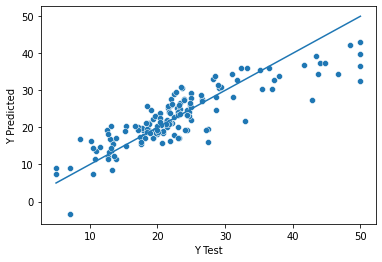

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test)

## Evaluating the Model
ประเมินความถูกต้องของโมเดล

**คำนวณค่า**
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 3.4318693222761603
Mean Square Error: 21.439149523649668
Root Mean Square Error : 4.630242922747106


In [ ]:
metrics.explained_variance_score(y_test, y_pred)

0.7536561414828234

In [ ]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: TARGET, dtype: float64

# Residuals

In [ ]:
res = y_test - y_pred
res.describe()

count    152.000000
mean       0.189735
std        4.641648
min       -8.282840
25%       -2.904648
50%       -0.481814
75%        1.936150
max       17.418543
Name: TARGET, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


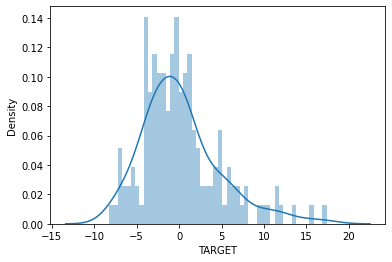

In [ ]:
sns.distplot(res, bins=50)

# Let's perform feature selection

Feature selection is the process of identifying and selecting a subset of input variables that are most relevant to the target variable.

Credit: [How to Perform Feature Selection for Regression Data](https://machinelearningmastery.com/feature-selection-for-regression-data/#:~:text=Feature%20selection%20is%20the%20process,target%20for%20regression%20predictive%20modeling)

There are two popular feature selection techniques that can be used for numerical input data and a numerical target variable.

**They are:**
- Correlation Statistics.
- Mutual Information Statistics.

### Correlation Feature Selection

Correlation is a measure of how two variables change together. Perhaps the most common correlation measure is Pearson’s correlation that assumes a Gaussian distribution to each variable and reports on their linear relationship.

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from matplotlib import pyplot

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)


# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select 5 features
	fs = SelectKBest(score_func=f_regression, k=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
X_train_fs[:10,]

In [ ]:
X_test_fs[:10,]

In [ ]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

*Note: We will revisit this when we performer feature selection for classification tasks*

### Model Built with All Features

The results are:
- Mean Absolute Error: 3.4318693222761447
- Mean Square Error: 21.43914952364965
- Root Mean Square Error : 4.6302429227471045




### Model Built Using Correlation Features

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')